# Airbnb price prediction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cargar-data" data-toc-modified-id="Cargar-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Cargar data</a></span></li><li><span><a href="#Feature-Engineering-(determinar-importancia-de-variables)" data-toc-modified-id="Feature-Engineering-(determinar-importancia-de-variables)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineering (determinar importancia de variables)</a></span><ul class="toc-item"><li><span><a href="#Transformar-categóricas" data-toc-modified-id="Transformar-categóricas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Transformar categóricas</a></span><ul class="toc-item"><li><span><a href="#room_type" data-toc-modified-id="room_type-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>room_type</a></span></li><li><span><a href="#city" data-toc-modified-id="city-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>city</a></span></li></ul></li></ul></li><li><span><a href="#train-/-test-split" data-toc-modified-id="train-/-test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>train / test split</a></span></li><li><span><a href="#Modelado" data-toc-modified-id="Modelado-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelado</a></span><ul class="toc-item"><li><span><a href="#Ajuste-de-los-Hiperparametros-de-un-Modelo" data-toc-modified-id="Ajuste-de-los-Hiperparametros-de-un-Modelo-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Ajuste de los Hiperparametros de un Modelo</a></span><ul class="toc-item"><li><span><a href="#Random-Search" data-toc-modified-id="Random-Search-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Random Search</a></span></li><li><span><a href="#GridSearch" data-toc-modified-id="GridSearch-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>GridSearch</a></span></li><li><span><a href="#GridSearching-Bayesiano" data-toc-modified-id="GridSearching-Bayesiano-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>GridSearching Bayesiano</a></span></li></ul></li></ul></li><li><span><a href="#Exportar-csv-predicciones" data-toc-modified-id="Exportar-csv-predicciones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exportar csv predicciones</a></span></li></ul></div>

## Cargar data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/airbnb_data.csv')

In [3]:
df.shape

(226030, 9)

In [4]:
df.columns

Index(['latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

We want to predict `price` variable

In [5]:
df.dtypes

latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
city                               object
dtype: object

In [7]:
import seaborn as sns

In [10]:
import numpy as np

In [20]:
df.shape

(226030, 9)

In [32]:
df = df[df.price > 5]

In [33]:
df.shape

(225960, 9)

<AxesSubplot:xlabel='price', ylabel='Count'>

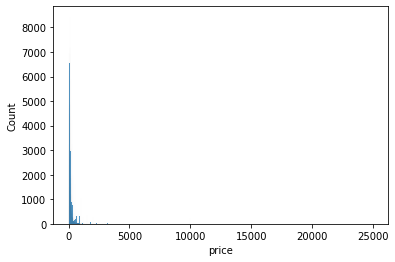

In [15]:
sns.histplot(df.price)

<AxesSubplot:xlabel='price', ylabel='Count'>

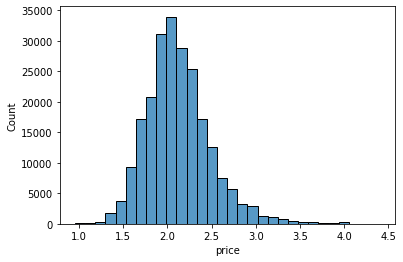

In [41]:
sns.histplot(np.log10(df.price), bins=30)

The natural metric for this problem is LOGMSE, lets transform the target variable

In [66]:
df.price = np.log10(df.price)

## Feature Engineering (determinar importancia de variables)

### Transformar categóricas

#### room_type

In [46]:
df.room_type.value_counts()

Entire home/apt    154163
Private room        65870
Shared room          4026
Hotel room           1901
Name: room_type, dtype: int64

In [47]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [48]:
room_rank = {
    'Entire home/apt': 4, 
    'Hotel room': 3, 
    'Private room': 2, 
    'Shared room': 1
}

In [49]:
df.room_type = df.room_type.map(room_rank)

#### city

In [51]:
df.city.nunique()

28

In [52]:
df.city.unique()

array(['Asheville', 'Austin', 'Boston', 'Broward County', 'Cambridge',
       'Chicago', 'Clark County', 'Columbus', 'Denver', 'Hawaii',
       'Jersey City', 'Los Angeles', 'Nashville', 'New Orleans',
       'New York City', 'Oakland', 'Pacific Grove', 'Portland',
       'Rhode Island', 'Salem', 'San Clara Country', 'San Diego',
       'San Francisco', 'San Mateo County', 'Santa Cruz County',
       'Seattle', 'Twin Cities MSA', 'Washington D.C.'], dtype=object)

In [54]:
df.city.value_counts()

New York City        45731
Los Angeles          31526
Hawaii               22433
San Diego            12403
Broward County       10855
Austin               10430
Clark County          8408
Washington D.C.       7349
San Clara Country     7091
San Francisco         7053
Seattle               6573
Twin Cities MSA       6469
New Orleans           6406
Chicago               6396
Nashville             6137
Portland              4280
Denver                4200
Rhode Island          3884
Boston                3337
Oakland               3203
San Mateo County      2847
Jersey City           2488
Asheville             2074
Santa Cruz County     1570
Columbus              1409
Cambridge             1029
Salem                  202
Pacific Grove          177
Name: city, dtype: int64

In [57]:
mean_enc = df.groupby("city").price.mean().sort_values()

In [65]:
mean_enc

city
Jersey City          137.039791
Oakland              140.000312
Portland             141.062617
New York City        149.639173
Chicago              153.043934
Denver               158.860714
Seattle              159.768751
San Clara Country    161.721760
Cambridge            163.072886
Boston               170.433923
New Orleans          175.029972
Washington D.C.      176.864880
San Mateo County     184.426063
Asheville            196.639344
Clark County         213.756660
Nashville            215.983542
Los Angeles          222.752680
Broward County       230.156426
Salem                247.727723
San Francisco        252.018857
Pacific Grove        253.949153
Santa Cruz County    257.264968
Austin               269.444104
Rhode Island         288.720906
Hawaii               309.099764
San Diego            318.846569
Columbus             321.718950
Twin Cities MSA      509.984851
Name: price, dtype: float64

In [59]:
df.city = df.city.map(mean_enc)

In [67]:
df.sample(5)

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,city
165601,37.81353,-122.27844,4,2.439333,3,1,1,0,140.000312
116485,29.96713,-90.06180,2,1.732394,1,4,60,364,175.029972
144778,40.80912,-73.93095,1,1.397940,1,37,7,103,149.639173
150525,40.81981,-73.94523,4,2.243038,5,19,2,185,149.639173
52872,19.04409,-155.61726,4,2.096910,1,106,4,365,309.099764


## train / test split

In [68]:
X = df.drop('price', axis=1)

y = df.price

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelado

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [72]:
from sklearn.metrics import mean_squared_error as mse

In [73]:
from sklearn.metrics import r2_score

In [74]:
X_train.shape

(180768, 8)

In [75]:
X_test.shape

(45192, 8)

In [76]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = linreg.predict(X_test)

In [78]:
mse(y_pred, y_test) ** 0.5   # RMSE

0.3062138177161705

In [86]:
tree = DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [89]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [91]:
mse(y_test, tree.predict(X_test)) ** 0.5

0.27246115727072706

In [106]:
%%time
rf = RandomForestRegressor(n_estimators=30, max_features=8, max_depth=10, min_samples_split=30)
rf.fit(X_train, y_train)

CPU times: user 19 s, sys: 0 ns, total: 19 s
Wall time: 19 s


RandomForestRegressor(max_depth=10, max_features=8, min_samples_split=30,
                      n_estimators=30)

In [107]:
mse(y_test, rf.predict(X_test)) ** 0.5

0.26543503586519646

### Ajuste de los Hiperparametros de un Modelo

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#### Random Search

In [ ]:
rfr=RFR()

In [ ]:
#n_estimators=[int(x) for x in np.linspace(200, 2000, 10)]

n_estimators=[500, 1000]

min_samples_split=[2, 5, 10]

max_features=['auto', 'sqrt']

bootstrap=[True, False]

In [ ]:
random_grid={'n_estimators': n_estimators,
             'min_samples_split': min_samples_split,
             'max_features': max_features,
             'bootstrap': bootstrap}

In [ ]:
rfr_random=RandomizedSearchCV(estimator=rfr,                    # modelo
                             param_distributions=random_grid,   # dictio de hiperparametros
                             n_iter=3,                          # iteraciones
                             cv=3,                              # cross-validation
                             verbose=1,                         # que me de feedback
                             n_jobs=-1,                         # -1 es todos los nucleos
                             scoring='r2'                       # metrica de error
                             )

In [ ]:
%%time

rfr_random.fit(X_train[:5000], y_train[:5000])

In [ ]:
rfr_random.best_estimator_ #.fit(X, y), ya es un modelo

In [ ]:
rfr_random.best_estimator_.fit(X[:5000], y[:5000])

In [ ]:
rfr_random.best_score_

In [ ]:
rfr_random.best_params_

#### GridSearch

In [ ]:
modelo=GridSearchCV(rfr,                        # modelo
                    random_grid,                # dictio de params
                    cv=3,                       # cross_validation
                    iid=True,                   # independiente e identicamente distribuido
                    return_train_score=True,    # para ver posible overfit
                    n_jobs=2
                   )

In [ ]:
%%time

modelo.fit(X_train[:2000], y_train[:2000])

In [ ]:
modelo.best_estimator_

In [ ]:
modelo.best_params_

#### GridSearching Bayesiano

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [ ]:
xgbr=xgb.XGBRegressor()

In [ ]:
help(xgbr)

In [ ]:
space={
    
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 25), # uniforme discreta de 10 a 1000 en saltos de 25
    
    'learning_rate': hp.uniform('learning_rate', 0.0001, 1.0), # uniforme continua entre 0.0001 y 1
    
    'gamma': hp.uniform('x_gamma', 0.1, 0.5)
}

In [ ]:
def objetivo(space):
    
    modelo=xgb.XGBRegressor(n_estimators=int(space['n_estimators']),
                            learning_rate=space['learning_rate'],
                            gamma=space['gamma'],
                            objective='reg:squarederror'
                           )
    
    eval_set=[(X_train, y_train), (X_test, y_test)]
    
    modelo.fit(X_train, y_train, eval_set=eval_set, eval_metric='rmse', verbose=False)
    
    y_pred=modelo.predict(X_test)
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status': STATUS_OK}

In [ ]:
mejor=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())

mejor

In [ ]:
modelo=xgb.XGBRegressor(n_estimators=int(mejor['n_estimators']), 
                       learning_rate=mejor['learning_rate'], 
                       gamma=mejor['x_gamma'],
                       objective='reg:squarederror')

In [ ]:
modelo.fit(X_train, y_train)

In [ ]:
y_pred=modelo.predict(X_test)

mse(y_test, y_pred)**0.5

# H2O (ML for dummies)

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()  # inicializa el servidor

In [ ]:
df=h2o.import_file('airbnb_data.csv')   # importar dataframe para h2o

In [ ]:
X=df.columns

y='price'

X.remove(y)

In [ ]:
df[y]=df[y].asfactor()

In [ ]:
aml=H2OAutoML(max_models=1, seed=1)

aml.train(x=X, y=y, training_frame=df)

In [ ]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

In [ ]:
aml.leader  # mejor modelo

In [ ]:
pred=aml.leader.predict(X)

pred

## Exportar csv predicciones

In [ ]:
len(y_pred)

In [ ]:
resultados=pd.DataFrame()

In [ ]:
resultados['id']=[i for i in range(len(y_test))]

In [ ]:
resultados['y_pred']=y_pred

In [ ]:
resultados.to_csv('my_submit.csv', index=False)  # necesario el index False para no poner otra columna

In [ ]:
pd.read_csv('my_submit.csv').head()   # como este tiene que ser

In [ ]:
resultados.to_csv('my_submit_malo.csv')

In [ ]:
pd.read_csv('my_submit_malo.csv').head()